<진행 순서>  
1. 서울의 기존 정류장들(약 12500개) 중 다람쥐 버스 정류장(95개)을 제외한 나머지 정류장들 중 기존 다람쥐 버스 정류장의 기점, 종점(14개)과 높은 유사도를 지닌 정류장을 100개씩 뽑아 총 1400 정류장으로 추림.
2. 추려진 정류장을 바탕으로 군집 진행하여 특성 파악 

In [64]:
import os
current_path = os.getcwd()
while os.path.split(current_path)[1] != 'src': 
    current_path = os.path.dirname(current_path)
img_path = os.path.join(current_path, 'Data','img')


sys.path.append('./Data/img/')
from Modeling.clustering import *
from IPython.display import Image, display, HTML

In [28]:
df_bus_not_daram = get_not_daram_station()

# numerical data만 추출
df_bus_not_daram_num = df_bus_not_daram.select_dtypes(include=['int','float'])
df_bus_not_daram.shape

(12453, 24)

In [29]:
df_bus_not_daram.columns

Index(['NODE_ID', '정류소명', 'X좌표', 'Y좌표', '법정동코드', '법정동_구', '법정동', 'academy_cnt',
       'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt', 'school_cnt',
       'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt', 'hospital_cnt',
       'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt', 'employee_cnt',
       'alone_ratio', 'emp_corp_ratio', 'population_15to64'],
      dtype='object')

In [30]:
df_daram_14 = get_daram_14_station_df()
df_daram_14 = preprocessing_cluster(df_daram_14)
# numerical data만 추출
df_daram_14_num = df_daram_14.select_dtypes(include=['int','float'])
df_daram_14_num.shape

(14, 17)

In [31]:
df_daram_14_num

,academy_cnt,kindergarten_cnt,mart_cnt,restaurant_cnt,school_cnt,university_cnt,subway_cnt,tour_cnt,cafe_cnt,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64
5,42,10,1,333,1,0,1,2,49,55,0,0,4,18996,0.129167,3.160732,40211
6,79,17,3,277,4,0,0,1,42,27,0,0,5,36170,0.127863,3.528780,48942
20,63,17,0,167,9,0,0,0,36,12,0,0,3,6242,0.088836,3.893949,22444
25,42,16,1,116,1,0,1,0,25,33,0,0,2,17706,0.136672,3.028738,53938
30,147,8,3,805,3,0,2,3,255,88,26,0,2,23823,0.328415,4.544639,10025
33,11,6,2,387,0,0,1,3,102,16,5,1,0,171415,0.087500,11.216057,20914
35,157,7,1,546,1,0,2,1,117,19,1,0,4,11158,0.219602,3.387371,19690
54,55,4,1,1005,1,1,2,2,190,84,4,0,4,61140,0.288663,3.375476,182596
62,12,10,0,54,4,1,0,1,8,4,0,0,2,61140,0.288663,3.375476,182596
67,98,23,2,546,3,0,1,1,98,52,1,0,4,61570,0.258852,3.828980,170048


# 1. 코사인 유사도
- 대상 데이터: 다람쥐 버스 정류장을 제외한 서울 전체 정류장
- 진행방법: 다람쥐 버스 기점, 종점(14개)과의 유사한 정류장을 각각 100개씩, 총 1400개 추출

In [32]:
# 다람쥐버스 정류장 95개
daram_df = get_daram_95station_df() # 95개 다람쥐 버스 정류장
reset_daram_df = daram_df.reset_index() # daram_df의 index reset
similarity_reset_daram_df = reset_daram_df.loc[:,'academy_cnt':'population_15to64'] # 95개 df에서 숫자데이터만 추출

# 다람쥐 버스 아닌 정류장 12453개
reset_original_bus_df = get_not_daram_station().reset_index() 
sim_reset_original_bus_df=reset_original_bus_df.loc[:,'academy_cnt':'population_15to64'] # 숫자 데이터만


# 다람쥐버스 기,종점만
st_end_daram_df=get_daram_14_station_df()
sim_st_end_daram_df=st_end_daram_df.loc[:,'academy_cnt':'population_15to64'] # 숫자 데이터만




In [33]:
# df_similar = 코사인 유사도 바탕으로 뽑힌 1400개 정류장
df_similar = get_cosine_similarity(sim_st_end_daram_df,sim_reset_original_bus_df,100)
df_similar = df_similar.drop_duplicates(subset='NODE_ID')
df_similar.shape

(1315, 26)

In [34]:
# 1400개 정류장의 위치를 folium을 통해 파악
get_clustering_folium(df_similar, 'X좌표','Y좌표')

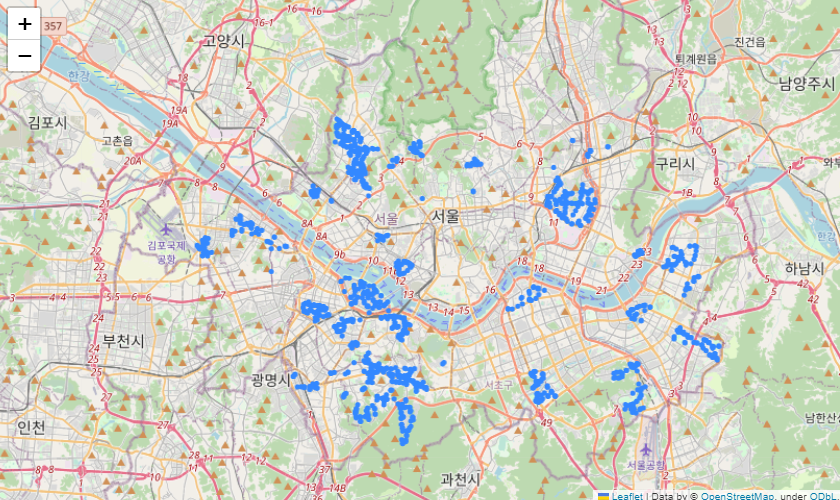{width=300px height=200px}




In [35]:
df_similar.shape
df_similar.columns

Index(['index', 'NODE_ID', '정류소명', 'X좌표', 'Y좌표', '법정동코드', '법정동_구', '법정동',
       'academy_cnt', 'kindergarten_cnt', 'mart_cnt', 'restaurant_cnt',
       'school_cnt', 'university_cnt', 'subway_cnt', 'tour_cnt', 'cafe_cnt',
       'hospital_cnt', 'culture_cnt', 'univ_hospital_cnt', 'public_office_cnt',
       'employee_cnt', 'alone_ratio', 'emp_corp_ratio', 'population_15to64',
       'station_label'],
      dtype='object')

# 2. clustering
- 코사인 유사도를 통해 추출한 1400개의 정류장을 군집.
- 사용기술:
    - Kmeans
    - GMM
    - DBscan

## 2-0. scaler & pca

### 1) scaler

In [36]:
df_similar_num = df_similar.select_dtypes(include=['int','float'])
df_similar_num = df_similar_num.reset_index(drop=True)

In [37]:
drop_col = ['index','station_label']
df_similar_num = df_similar_num.drop(drop_col, axis =1)
df_similar_num.shape

(1315, 17)

In [38]:
df_similar_num.describe()

,academy_cnt,kindergarten_cnt,mart_cnt,restaurant_cnt,school_cnt,university_cnt,subway_cnt,tour_cnt,cafe_cnt,hospital_cnt,culture_cnt,univ_hospital_cnt,public_office_cnt,employee_cnt,alone_ratio,emp_corp_ratio,population_15to64
count,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000
mean,56.149049,11.743726,1.216730,300.679848,2.415970,0.193916,0.730038,1.211407,68.694297,37.335361,3.155133,0.059316,2.219772,40114.477567,0.166747,5.008551,58289.606844
std,40.171671,6.487937,1.075262,221.615344,1.768459,0.395515,0.896112,1.949755,52.252410,38.387545,5.676486,0.236304,1.575470,43693.985691,0.081046,2.698325,61462.984550
min,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1255.000000,0.034599,2.643029,1160.000000
25%,24.000000,7.000000,0.000000,124.000000,1.000000,0.000000,0.000000,0.000000,30.500000,11.000000,0.000000,0.000000,1.000000,10357.500000,0.115202,3.304223,19690.000000
50%,54.000000,12.000000,1.000000,264.000000,2.000000,0.000000,1.000000,1.000000,57.000000,28.000000,1.000000,0.000000,2.000000,23004.000000,0.139015,3.828980,32217.000000
75%,80.000000,16.000000,2.000000,408.500000,3.000000,0.000000,1.000000,2.000000,92.000000,51.000000,3.000000,0.000000,3.000000,61140.000000,0.197213,5.999406,62587.000000
max,325.000000,33.000000,6.000000,1217.000000,9.000000,1.000000,5.000000,26.000000,329.000000,418.000000,44.000000,1.000000,8.000000,183104.000000,0.452023,15.536977,182596.000000


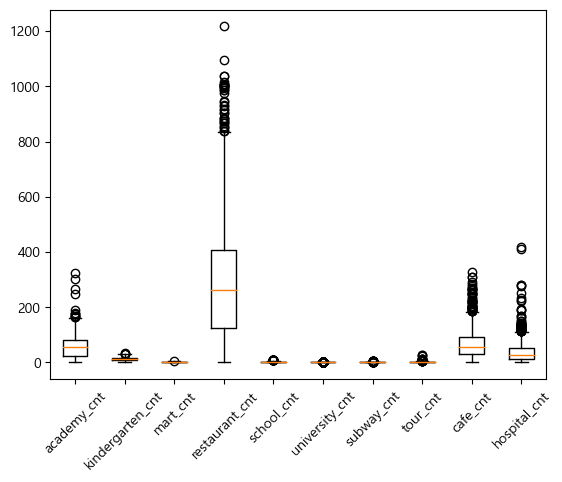

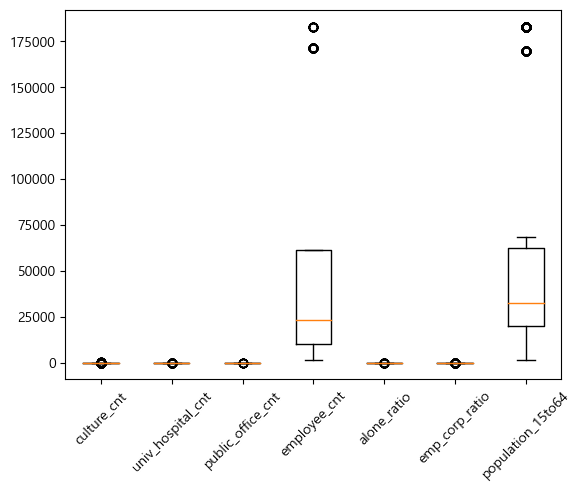

In [39]:
# Extract column names for each subset
subset1_columns = df_similar_num.columns[:10]
subset2_columns = df_similar_num.columns[10:]



plt.boxplot(df_similar_num.iloc[:, :10])
plt.xticks(range(1, len(subset1_columns) + 1), subset1_columns, rotation=45)
plt.show()


plt.boxplot(df_similar_num.iloc[:, 10:])
plt.xticks(range(1, len(subset2_columns) + 1), subset2_columns, rotation=45)
plt.show()



In [40]:
# df_minmax = scaler(df_similar_num, 'minmax')
df_robust = scaler(df_similar_num, 'robust')
# df_standard = scaler(df_similar_num, 'standard')


- 위의 boxplot을 살펴보면 academy, restaurant, hospital 등 이상치가 많은 데이터들이 있다.
- 중앙값과 IQR을 사용하여 이상치에 민감하지 않은 robust scaler를 사용했다.

### 2) PCA

- 현재 데이터는 17차원
- 데이터 피쳐 중 중요한 피처만 뽑아 모델의 설명력, 예측력을 더 높이기 위해 pca 선택


In [41]:
pca_explained_variance_ration(df_robust)

,설명가능한 분산 비율(고윳값),기여율,누적 기여율
pca_1,4.844769,0.316786,0.316786
pca_2,2.902126,0.189762,0.506548
pca_3,1.834720,0.119967,0.626515
pca_4,1.664089,0.108810,0.735325
pca_5,0.796443,0.052077,0.787403
pca_6,0.684906,0.044784,0.832187
pca_7,0.578047,0.037797,0.869984
pca_8,0.458740,0.029996,0.899979
pca_9,0.408462,0.026708,0.926687
pca_10,0.305056,0.019947,0.946634


- pca 차원 선택 기준 
    1. 누적 기여율 > 0.7

- 6차원으로 차원축소 결정

In [42]:
pca_6_df = func_pca(df_robust, 6)
pca_6_df

분산 설명력 :  0.8321866893736003


,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6
0,-0.707867,-0.299968,-0.787584,-0.055454,0.648526,0.995420
1,-0.630363,-0.176608,-1.352171,-0.415561,0.850213,0.171546
2,-0.687045,-0.279873,-0.864459,-0.078261,0.634682,0.987805
3,-0.544441,-0.167778,-1.101407,-0.077009,1.137501,0.738952
4,-0.561236,-0.217231,-0.770395,0.053938,1.042461,0.905232
...,...,...,...,...,...,...
1310,-0.673028,-0.764475,-1.767371,-1.553527,-0.695734,-0.127635
1311,-0.705184,-0.793221,-1.721635,-1.543154,-0.685037,-0.158957
1312,0.773716,-0.820431,0.764226,-1.639534,-0.259012,-0.682520
1313,-0.318495,-1.027657,-2.454635,-1.646896,-0.600357,-0.949341


## 2-1. kmeans

- kmeans의 군집개수 결정을 위해 사용한 method
  - elbow method
  - calinski score 
  - 실루엣 계수

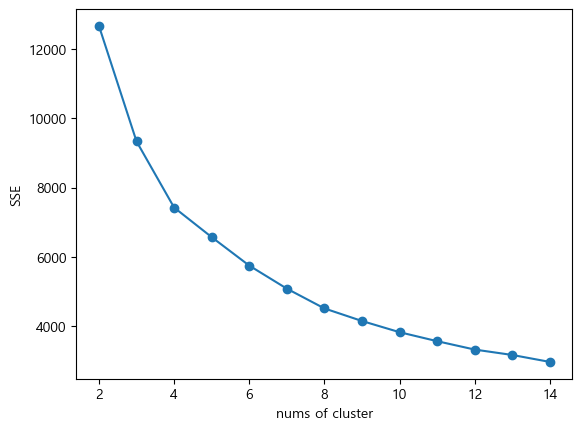

calinski-score 2 개 군집: 420.93647153148515
calinski-score 3 개 군집: 519.5682928356688
calinski-score 4 개 군집: 547.2866280697409
calinski-score 5 개 군집: 506.06872092410094
calinski-score 6 개 군집: 499.7511175788151
calinski-score 7 개 군집: 499.0701697527761
calinski-score 8 개 군집: 505.08316520657235
calinski-score 9 개 군집: 494.45856507298424
calinski-score 10 개 군집: 488.471120927763
calinski-score 11 개 군집: 480.6979239566111
calinski-score 12 개 군집: 477.0513915147639
calinski-score 13 개 군집: 463.75066695419144
calinski-score 14 개 군집: 463.38282477733895


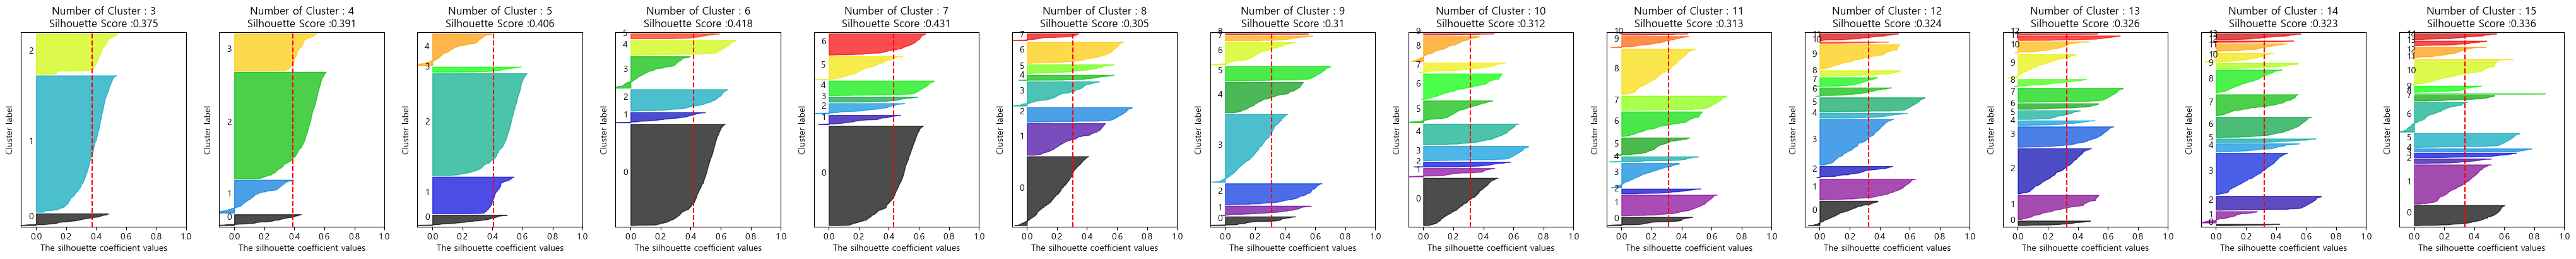

In [43]:
elbow_method(2, 15, pca_6_df)
visualize_silhouette([3,4,5,6,7,8,9,10,11,12,13,14,15],pca_6_df)
calinski_harabasz(2,15, pca_6_df)

- elbow method: 군집 개수 9개에서 기울기가 완만해지기 시작.
- calinski-score:  군집 개수 2~4, 9에서 calinski-score가 상승세. 
- 실루엣 계수: 모두 실루엣 계수가 낮지만, 군집 개수 10~11개가 군집 간 비율이 적절하게 나뉘어졌다고 생각.  
<br></br>
- 최종 군집 개수: 세개의 method를 모두 고려했을 때, Kmeans의 군집 개수는 10개가 가장 적당하다고 생각되어 8개로 결정.

In [44]:
df_kmeans = clustering_kmeans(pca_6_df,10,'k-means++',300,0)
kmeans_label = df_kmeans['kmeans_label']

In [45]:
# del df_similar['kmeans_lst']
df_kmeans_standard = df_similar[::]
df_kmeans_standard['kmeans_label'] = df_kmeans['kmeans_label'].values


In [ ]:
get_clustering_folium(df_kmeans_standard,'X좌표','Y좌표','kmeans_label')


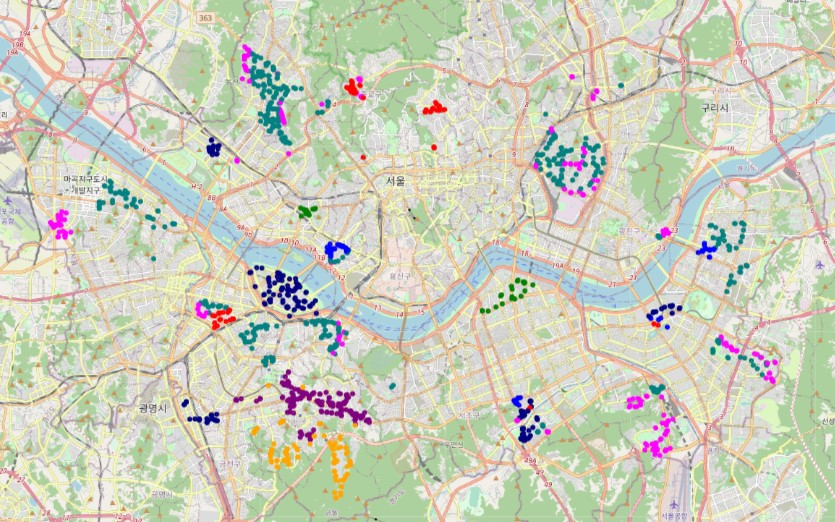

## 2-2. GMM

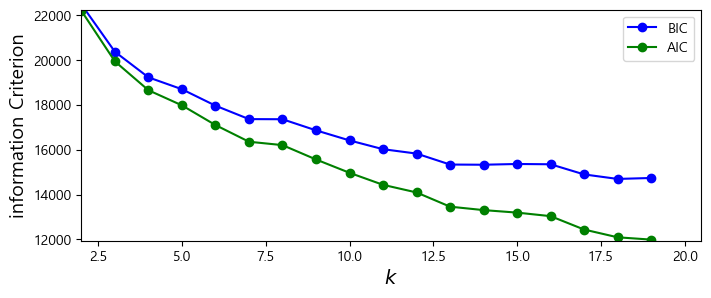

In [47]:
bic_aic(pca_6_df, 2, 20)

In [48]:
df_gmm = clustering_gmm(pca_6_df, 11, 42)
df_gmm

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,gmm_label
0,-0.707867,-0.299968,-0.787584,-0.055454,0.648526,0.995420,0
1,-0.630363,-0.176608,-1.352171,-0.415561,0.850213,0.171546,0
2,-0.687045,-0.279873,-0.864459,-0.078261,0.634682,0.987805,0
3,-0.544441,-0.167778,-1.101407,-0.077009,1.137501,0.738952,0
4,-0.561236,-0.217231,-0.770395,0.053938,1.042461,0.905232,0
...,...,...,...,...,...,...,...
1310,-0.673028,-0.764475,-1.767371,-1.553527,-0.695734,-0.127635,5
1311,-0.705184,-0.793221,-1.721635,-1.543154,-0.685037,-0.158957,5
1312,0.773716,-0.820431,0.764226,-1.639534,-0.259012,-0.682520,4
1313,-0.318495,-1.027657,-2.454635,-1.646896,-0.600357,-0.949341,5


In [49]:
df_gmm_robust_pca = df_similar.copy()
df_gmm_robust_pca['gmm_label']  = df_gmm['gmm_label'].values
df_gmm_robust_pca['gmm_label'].nunique()

11

In [ ]:
get_clustering_folium(df_gmm_robust_pca,'X좌표','Y좌표','gmm_label')

<img src="./Data/img/1400_gmm.png" width="600">

## 2-3. DBSCAN

# 3. clustering 결론

#### 3-1. 군집별 결과 비교  
<img src='./Data/img/clustering_img2.png' width="1000" height="400">

- 시도해본 clustering 종류: GMM, KMeans, DBscan 
- 세가지 clustering 중 군집 간의 변별력이 가장 높고 각 군집의 특성이 잘 보이는 clustering은 GMM이었다.
- ☑️최종 군집 방법 : GMM

#### 3-2. GMM 군집 결과 해석

##### 1) GMM 군집별 특징


In [70]:
display(HTML(f'<img src="./Data/img/tb_1.png" width="600">'))

##### 2) GMM 군집을 통해 추출한 기준3
- 기존 노선들의 군집을 살펴보니 아래의 사실을 발견.
  - 기점이 거주지인 노선 → 기점-종점의 클러스터 동일 or 상이
  - 기점이 거주지가 아닌 번화가, 업무지구인 노선  →  기점-종점의 클러스터가 반드시 상이

- 이 사실을 바탕으로 새로운 다람쥐 버스의 노선을 설정할 때 참고할 기준3을 설립.
  

<img src="./img/clustering_img3.png" width="800" height="400">


#### ✅기준3: 
- 기점이 거주지일 때 → 기, 종점이 동일한 클러스터 or 기,종점이 서로 다른 클러스터.
- 기점이 거주지가 아닐 때 → 기, 종점이 반드시 서로 다른 클러스터여야 함. 